## Stanisław Rachwał

### Streszczenie
Celem projektu było odtworzenie operacji wykonanych na danych w artykule: "Impact of slow breathing on the blood pressure and subarachnoid space width oscillations in humans" (https://doi.org/10.1038/s41598-019-42552-9). Do dalszej analizy w preciwieństwie do artykułu wykorzystano transformację Fouriera. Otrzymane w ten sposób wyniki jednakże różnią się od oczekiwanych.

### Abstract
The goal of the project was to reproduce the operations performed on the data in the article: "Impact of slow breathing on the blood pressure and subarachnoid space width oscillations in humans" (https://doi.org/10.1038/s41598-019-42552-9). A Fourier transform was used for further analysis in precession to the article. The results thus obtained, however, differ from those expected.

## Potrzebne importy / Imports


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Zadanie 1

Przygotować dane do analizy: wybrać zapis z jednego ochotnika, pozbyć się trendu np. wykorzystując metodę średniej ruchomej (o odpowiedniej szerokości okna).


In [16]:
mat = loadmat('dane.mat')
mdata = mat['BP_sub1']
len(mdata)

171471

Parametry sygnału:


In [23]:
fs = 70
dt = 1/fs
n = len(mdata)
time = np.arange(0, dt*n, dt)

In [24]:
data = {'time': time,
        'original': mdata.flatten()
        }

df = pd.DataFrame.from_dict(data)

In [37]:
df['3MA'] = df['original'].rolling(window=3).mean()
df['5MA'] = df['original'].rolling(window=5).mean()
df['10MA'] = df['original'].rolling(window=10).mean()

Text(0, 0.5, 'BP [mmHg]')

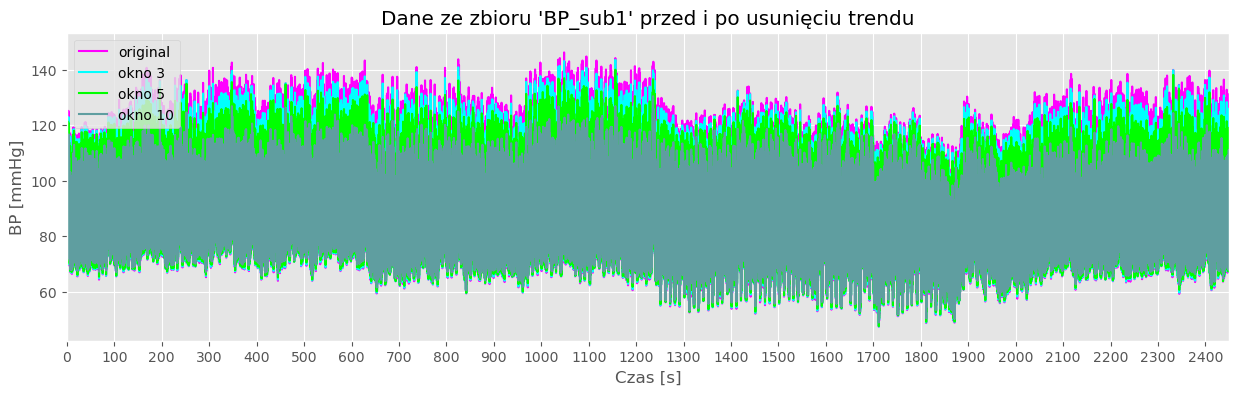

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 4))
plt.plot(df.time, df.original, color='#ff00ff', label='original')
plt.plot(df.time, df['3MA'], color='#00ffff', label='okno 3')
plt.plot(df.time, df['5MA'], color='#00ff00', label='okno 5')
plt.plot(df.time, df['10MA'], color='cadetblue', label='okno 10')

plt.legend()
plt.xticks(np.arange(0, df.time.values.max() + 1, 100))
plt.xlim([0, df.time.values.max() + 1])
# plt.ylim([60, 150])
plt.title('Dane ze zbioru \'BP_sub1\' przed i po usunięciu trendu')
plt.xlabel('Czas [s]')
plt.ylabel('BP [mmHg]')

Do dalszej analizy wybrano dane po uśrednieniu średnią kroczącą z oknem 5.

## Zadanie 2

Podzielić sygnały BP na 4 etapy eksperymentu.


In [39]:
t0 = 13 / dt
t1 = (10*60+13) / dt
t2 = (20*60+14) / dt
t3 = (30*60+15) / dt
t4 = (40*60+16) / dt

In [50]:
stage1 = df['5MA'].loc[t0:t1]
stage2 = df['5MA'].loc[t1:t2]
stage3 = df['5MA'].loc[t2:t3]
stage4 = df['5MA'].loc[t3:t4]

time1 = df['time'].loc[t0:t1]
time2 = df['time'].loc[t1:t2]
time3 = df['time'].loc[t2:t3]
time4 = df['time'].loc[t3:t4]

In [68]:
def plot_sth(x, y, info):
    plt.style.use('ggplot')
    plt.figure(figsize=(15, 5))

    plt.plot(x, y, color='cadetblue')

    plt.xticks(np.arange(x.min(), x.max() + 1, 100))
    plt.xlim([x.min(), x.max() + 1])

    plt.title('Reprezentacja danych dla etapu ' + info)
    plt.xlabel('Czas [s]')
    plt.ylabel('BP [mmHg]')

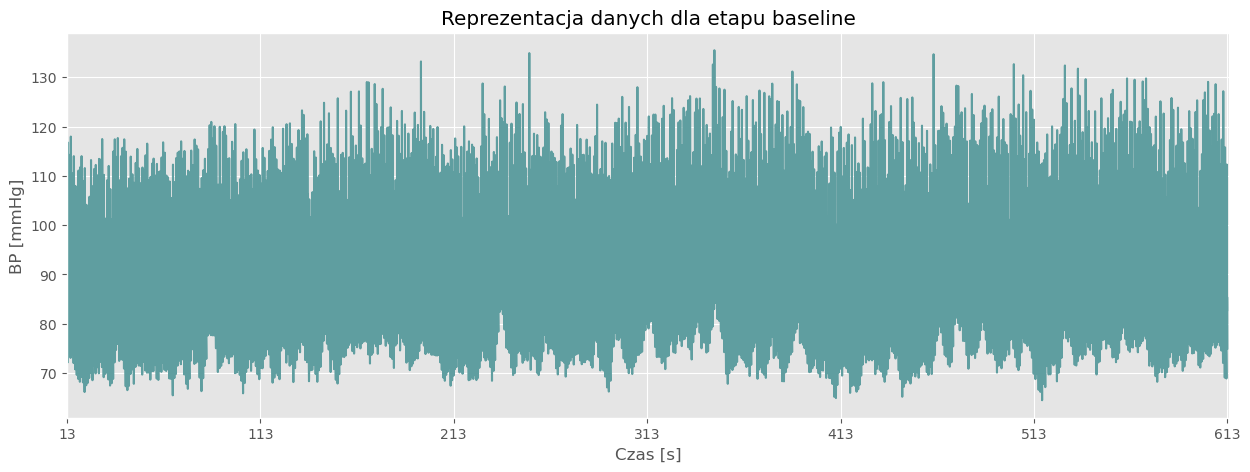

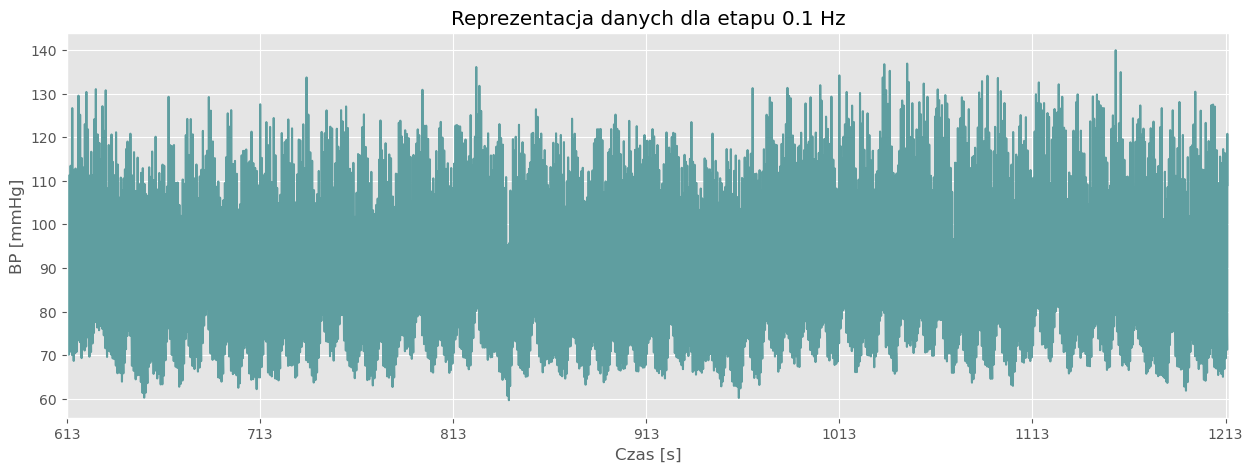

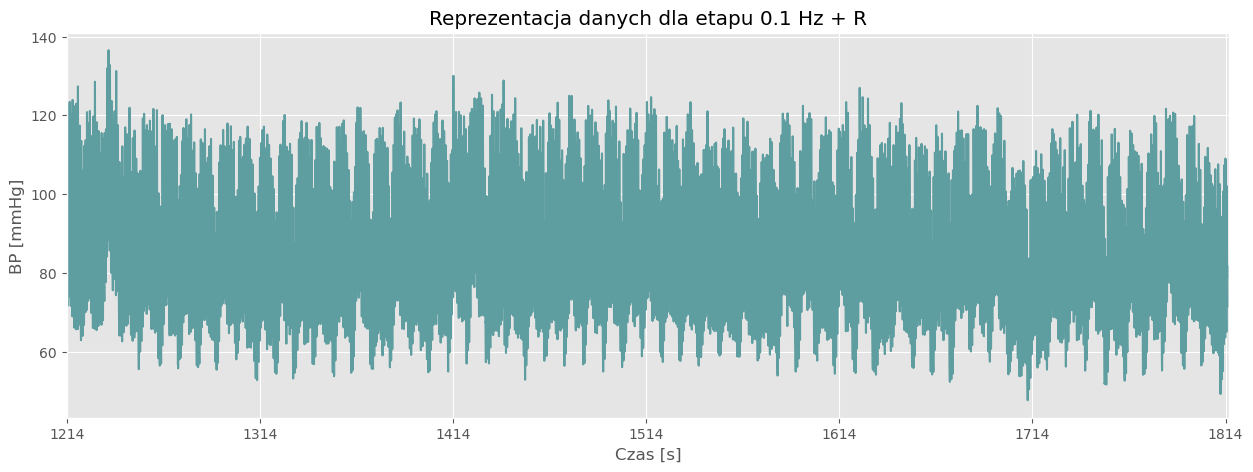

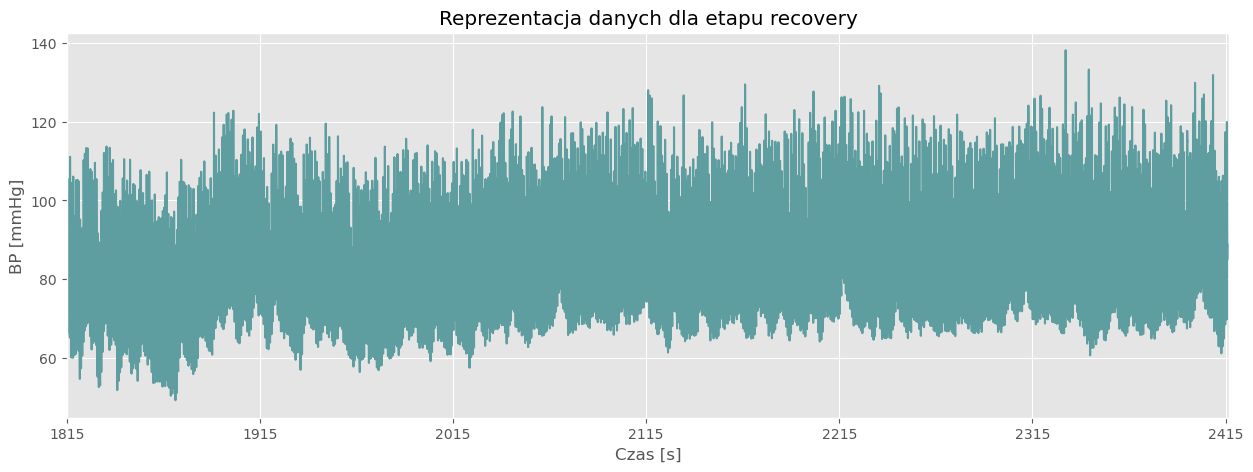

In [69]:
plot_sth(time1, stage1, 'baseline')
plot_sth(time2, stage2, '0.1 Hz')
plot_sth(time3, stage3, '0.1 Hz + R')
plot_sth(time4, stage4, 'recovery')

## Zadanie 3

Wykonać analizę częstotliwościową (periodogram) dla każdego z etapów osobno oraz czasowo-częstotliwościową (spektrogram) dla całego eksperymentu, do analizy wziąć nfft = 4096 próbek, liczba próbek nakładających się = 4000. Porównać uzyskane dane z publikacją.


In [71]:
from scipy import signal

nfft = 4096
npn = 4000

In [86]:
def periodogram(x, info):
    plt.style.use('ggplot')
    plt.figure(figsize=(6, 4))

    plt.psd(x, NFFT=nfft, Fs=fs)
    plt.title('Periodogram dla etapu ' + info)

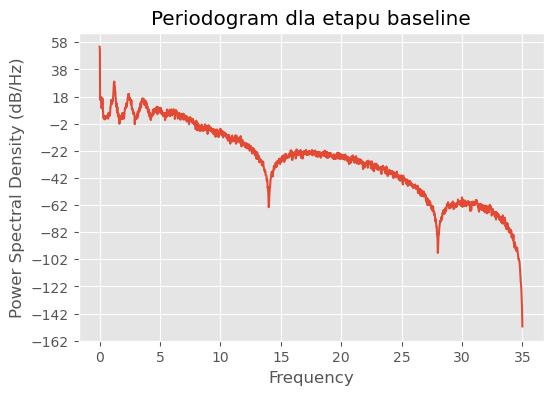

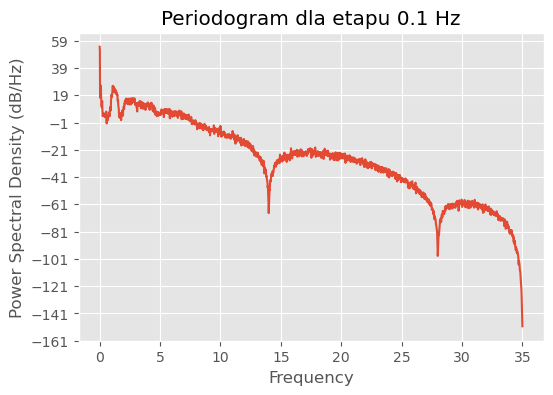

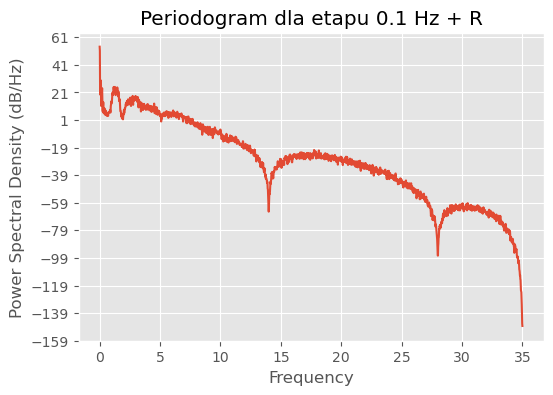

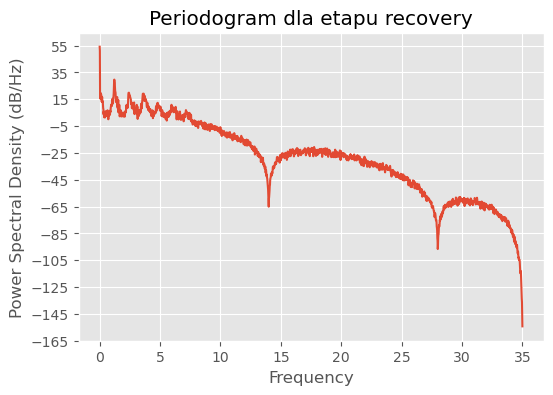

In [87]:
periodogram(stage1, 'baseline')
periodogram(stage2, '0.1 Hz')
periodogram(stage3, '0.1 Hz + R')
periodogram(stage4, 'recovery')

(array([[           nan, 2.85238448e+05, 2.85621273e+05, ...,
         2.75257243e+05, 2.74500722e+05, 2.73832210e+05],
        [           nan, 1.42419047e+05, 1.42885238e+05, ...,
         1.32436854e+05, 1.32379595e+05, 1.32671797e+05],
        [           nan, 1.69966766e+01, 1.69661482e+01, ...,
         2.71089584e+02, 2.40542600e+02, 2.09817135e+02],
        ...,
        [           nan, 2.96031189e-15, 3.25725707e-15, ...,
         4.97484341e-16, 6.42288981e-16, 1.59127026e-15],
        [           nan, 6.61864847e-17, 1.26766093e-16, ...,
         8.09708180e-16, 7.02612274e-16, 2.69755605e-16],
        [           nan, 2.12640910e-16, 1.39506939e-16, ...,
         4.22613697e-16, 3.85118510e-16, 1.29515051e-16]]),
 array([0.00000000e+00, 1.70898438e-02, 3.41796875e-02, ...,
        3.49658203e+01, 3.49829102e+01, 3.50000000e+01]),
 array([  29.25714286,   30.62857143,   32.        , ..., 2416.91428571,
        2418.28571429, 2419.65714286]),
 <matplotlib.image.AxesImage at 0

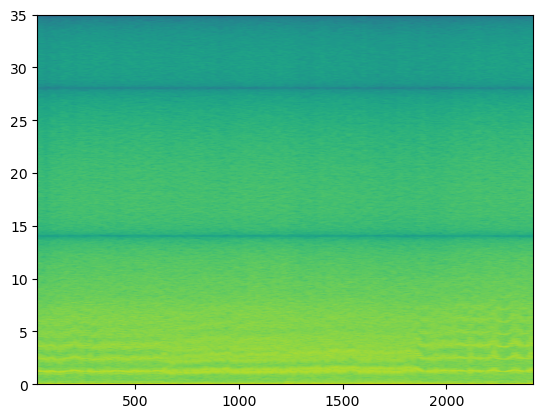

In [114]:
plt.style.use('default')
plt.specgram(df['5MA'], Fs=fs, NFFT=nfft, noverlap=npn)

-   Zarówno periodogramy jak i spektrogram różnią się od tych z artykułu. Może wynikać to z różnic w działaniu oprogramowania (np. innych implementacji tych samych funkcji).
-   Inną możliwością może być to, że w artykule wykorzystano transformację falkową w celu wykreślenia periodogramów, podczas gdy w tym kodzie wykorzystano szybką transformację Fouriera (FFT).
-   Istnieje możliwość, że działanie którejś z funkcji wizualizacji nie przebiegło poprawnie.
